In [1]:
###################################################################################################
#
# Copyright (C) 2022 Maxim Integrated Products, Inc. All Rights Reserved.
#
# Maxim Integrated Products, Inc. Default Copyright Notice:
# https://www.maximintegrated.com/en/aboutus/legal/copyrights.html
#
###################################################################################################

import os
import sys

import numpy as np
import torch

import matplotlib.patches as patches
import matplotlib.pyplot as plt

sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '../models/'))


from collections import OrderedDict

import ai8x
from datasets import svhn
from utils import parse_obj_detection_yaml

ai85net_tinierssd = __import__("ai85net-tinierssd")

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_path = '/home/skim945/ECE189/ai8x-training/data'

class Args:
    def __init__(self, act_mode_8bit):
        self.act_mode_8bit = act_mode_8bit
        self.truncate_testset = False

args = Args(act_mode_8bit=False)

train_set, test_set = svhn.SVHN_74_get_datasets((data_path, args), load_train=True, load_test=False)



Download the archive file from: http://ufldl.stanford.edu/housenumbers/[train or test].tar.gz
Review the terms and conditions on http://ufldl.stanford.edu/housenumbers/ and then download...
Extract the downloaded archive to path /data/SVHN
E.g. The training image files and digitStruct.mat file containing all annotations will reside under folder: /data/SVHN/training



SystemExit: 

In [3]:
num_classes = 11

ai8x.set_device(85, False, False)

model = ai85net_tinierssd.ai85tinierssd(num_classes=num_classes, device=device)

# Run training first, using scripts/train_svhn_tinierssd.sh
checkpoint = torch.load('../latest_log_dir/best.pth.tar')
state_dict = checkpoint['state_dict']

is_multi_gpu = all([key.startswith('module') for key in state_dict.keys()])

if is_multi_gpu:

    new_state_dict = OrderedDict()
    for key, value in state_dict.items():
        new_key = key.replace('module.', '')
        new_state_dict[new_key] = value

    model.load_state_dict(new_state_dict)

else:
    model.load_state_dict(state_dict)

model = model.to(device)

Configuring device: MAX78000, simulate=False.


RuntimeError: Error(s) in loading state_dict for TinierSSD:
	Missing key(s) in state_dict: "base.fire1.op.bias", "base.fire1.bn.weight", "base.fire1.bn.bias", "base.fire1.bn.running_mean", "base.fire1.bn.running_var", "base.fire2.op.bias", "base.fire2.bn.weight", "base.fire2.bn.bias", "base.fire2.bn.running_mean", "base.fire2.bn.running_var", "pred_convs.loc_fire8.output_shift", "pred_convs.loc_fire8.weight_bits", "pred_convs.loc_fire8.bias_bits", "pred_convs.loc_fire8.quantize_activation", "pred_convs.loc_fire8.adjust_output_shift", "pred_convs.loc_fire8.shift_quantile", "pred_convs.loc_fire8.op.weight", "pred_convs.loc_fire8.op.bias", "pred_convs.loc_fire8.bn.weight", "pred_convs.loc_fire8.bn.bias", "pred_convs.loc_fire8.bn.running_mean", "pred_convs.loc_fire8.bn.running_var", "pred_convs.loc_fire10.output_shift", "pred_convs.loc_fire10.weight_bits", "pred_convs.loc_fire10.bias_bits", "pred_convs.loc_fire10.quantize_activation", "pred_convs.loc_fire10.adjust_output_shift", "pred_convs.loc_fire10.shift_quantile", "pred_convs.loc_fire10.op.weight", "pred_convs.loc_fire10.op.bias", "pred_convs.loc_fire10.bn.weight", "pred_convs.loc_fire10.bn.bias", "pred_convs.loc_fire10.bn.running_mean", "pred_convs.loc_fire10.bn.running_var", "pred_convs.cl_fire8.output_shift", "pred_convs.cl_fire8.weight_bits", "pred_convs.cl_fire8.bias_bits", "pred_convs.cl_fire8.quantize_activation", "pred_convs.cl_fire8.adjust_output_shift", "pred_convs.cl_fire8.shift_quantile", "pred_convs.cl_fire8.op.weight", "pred_convs.cl_fire8.op.bias", "pred_convs.cl_fire8.bn.weight", "pred_convs.cl_fire8.bn.bias", "pred_convs.cl_fire8.bn.running_mean", "pred_convs.cl_fire8.bn.running_var", "pred_convs.cl_fire10.output_shift", "pred_convs.cl_fire10.weight_bits", "pred_convs.cl_fire10.bias_bits", "pred_convs.cl_fire10.quantize_activation", "pred_convs.cl_fire10.adjust_output_shift", "pred_convs.cl_fire10.shift_quantile", "pred_convs.cl_fire10.op.weight", "pred_convs.cl_fire10.op.bias", "pred_convs.cl_fire10.bn.weight", "pred_convs.cl_fire10.bn.bias", "pred_convs.cl_fire10.bn.running_mean", "pred_convs.cl_fire10.bn.running_var". 
	size mismatch for base.fire1.op.weight: copying a param with shape torch.Size([16, 3, 3, 3]) from checkpoint, the shape in current model is torch.Size([32, 3, 3, 3]).
	size mismatch for base.fire2.op.weight: copying a param with shape torch.Size([32, 16, 3, 3]) from checkpoint, the shape in current model is torch.Size([32, 32, 3, 3]).
	size mismatch for pred_convs.loc_fire9.op.weight: copying a param with shape torch.Size([8, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 32, 3, 3]).
	size mismatch for pred_convs.loc_fire9.op.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_fire9.bn.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_fire9.bn.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_fire9.bn.running_mean: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_fire9.bn.running_var: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_conv12_2.op.weight: copying a param with shape torch.Size([8, 16, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 16, 3, 3]).
	size mismatch for pred_convs.loc_conv12_2.op.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_conv12_2.bn.weight: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_conv12_2.bn.bias: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_conv12_2.bn.running_mean: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.loc_conv12_2.bn.running_var: copying a param with shape torch.Size([8]) from checkpoint, the shape in current model is torch.Size([16]).
	size mismatch for pred_convs.cl_fire9.op.weight: copying a param with shape torch.Size([4, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([44, 32, 3, 3]).
	size mismatch for pred_convs.cl_fire9.op.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_fire9.bn.weight: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_fire9.bn.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_fire9.bn.running_mean: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_fire9.bn.running_var: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_conv12_2.op.weight: copying a param with shape torch.Size([4, 16, 3, 3]) from checkpoint, the shape in current model is torch.Size([44, 16, 3, 3]).
	size mismatch for pred_convs.cl_conv12_2.op.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_conv12_2.bn.weight: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_conv12_2.bn.bias: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_conv12_2.bn.running_mean: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).
	size mismatch for pred_convs.cl_conv12_2.bn.running_var: copying a param with shape torch.Size([4]) from checkpoint, the shape in current model is torch.Size([44]).

In [6]:
obj_detection_params_yaml_file = '../parameters/obj_detection_params_svhn.yaml'
obj_detection_params = parse_obj_detection_yaml.parse(obj_detection_params_yaml_file)

{'multi_box_loss': {'alpha': 2, 'neg_pos_ratio': 3}, 'nms': {'min_score': 0.2, 'max_overlap': 0.3, 'top_k': 20}}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 74, 74])


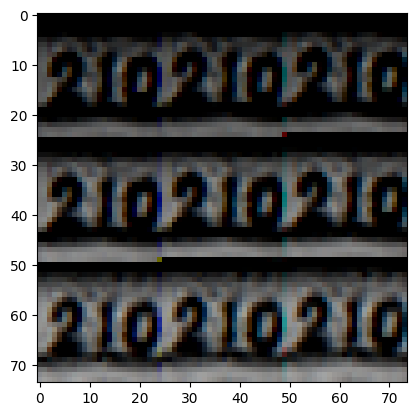

In [32]:
selected_idx = 1 #np.random.randint(len(test_set))

img, (boxes, lbls) = test_set[selected_idx]
img = img.to(device)
img_to_plot = ((128*(img.detach().cpu().numpy()+1))).astype(np.uint8)
img_to_plot = img_to_plot.transpose([1,2,0])

img_model = img.unsqueeze(0)
print(img.shape)
img = np.reshape(img, ( 74,74,3))
# print(np.rollaxis(img_model,1,4).shape)
# print(img_model.shape)
plt.imshow(img)

# plt.show()
# locs, scores = model(img_model)

# all_images_boxes, all_images_labels, all_images_scores = \
#     model.detect_objects(locs, scores,
#                          min_score=obj_detection_params['nms']['min_score'],
#                          max_overlap=obj_detection_params['nms']['max_overlap'],
#                          top_k=obj_detection_params['nms']['top_k'])


[0]
1


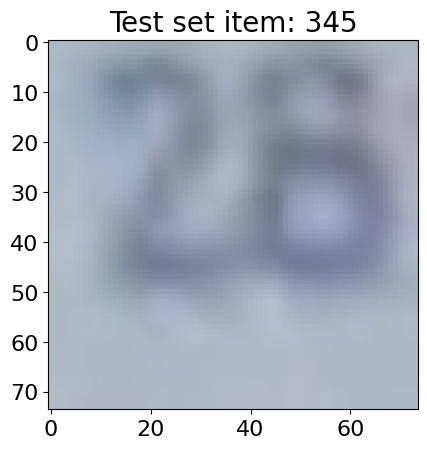

In [13]:
fig, ax = plt.subplots(1)
ax.imshow(img_to_plot)

plt.tick_params(labelsize=16)
        
subplot_title=("Test set item: " + str(selected_idx))
ax.set_title(subplot_title, fontsize = 20)

# Truth boxes
# boxes_resized = [[box_coord * test_set.resize_size[0] for box_coord in box] for box in boxes]
# print(len(boxes_resized))
# for b in range(len(boxes)):
#     bb = boxes_resized[b]
#     rect = patches.Rectangle((bb[0], bb[1]), bb[2] - bb[0], bb[3] - bb[1], linewidth=3,
#                             edgecolor='r', facecolor="none")
#     ax.add_patch(rect)

# Predicted boxes
boxes_resized = [[box_coord * test_set.resize_size[0] for box_coord in box.detach().cpu().numpy()] for box in all_images_boxes]
detected_labels = [val.item() if val.item() != 10 else 0 for val in all_images_labels[0]]
print(detected_labels)
print(len(boxes_resized))
for b in range(len(boxes_resized[0])):
    if(detected_labels[b] != 0):
        bb = boxes_resized[0][b]
        rect = patches.Rectangle((bb[0], bb[1]), bb[2] - bb[0], bb[3] - bb[1], linewidth=3,
                                edgecolor='b', facecolor="none")
        
        ax.text(bb[0],(bb[1]), detected_labels[b], verticalalignment='center', color='white', fontsize=18, weight='bold')
        ax.add_patch(rect)    
plt.show()